<a href="https://colab.research.google.com/github/Mero928/SPWLA_Webinar_Jan_2021/blob/main/SPWLA_Facies_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import  StandardScaler
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import butter, filtfilt
from sklearn.model_selection import train_test_split,learning_curve


pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)


In [ ]:
#Define the Filter function in toder to create the well log facies 
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Earthid/PythonBatch/well1.csv')
data['VELP']=1000000/data.DT
data = data[['DEPTH', 'RHOB', 'VELP', 'GR','FACIES' ]]
data = data.dropna(how='any')
data['RHOBF'] = butter_lowpass_filter(data.RHOB.values,10,1000/1, order=5)
data['VELPF'] = butter_lowpass_filter(data.VELP.values,10,1000/1, order=5)
data['GRF'] = butter_lowpass_filter(data.GR.values,10,1000/1, order=5)
data = data[['DEPTH', 'RHOB', 'VELP', 'GR','FACIES' ]]

In [ ]:
data.columns

Index(['DEPTH', 'RHOB', 'VELP', 'GR', 'FACIES'], dtype='object')

In [ ]:

X_train = data.iloc[:,1:4].values
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
Y_train = data.iloc[:,-1].values

#X_train, x_test, Y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,Y_train)  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

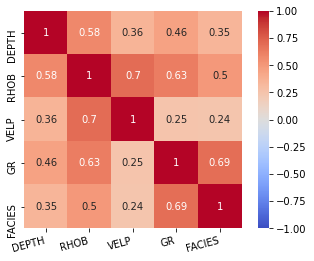

In [ ]:
#### Correlation matrix
cor_train = data.corr()
cor_test = data.corr()
ax = sns.heatmap(
    cor_train,
    vmin=-1, vmax=1, center=0,
    cmap='coolwarm',
    square=True,annot = True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=15,
    horizontalalignment='right')
plt.show()

In [ ]:
data.index

Int64Index([1427, 1428, 1429, 1430, 1431, 1432, 1433, 1434, 1435, 1436,
            ...
            9670, 9671, 9672, 9673, 9674, 9675, 9676, 9677, 9678, 9679],
           dtype='int64', length=8253)

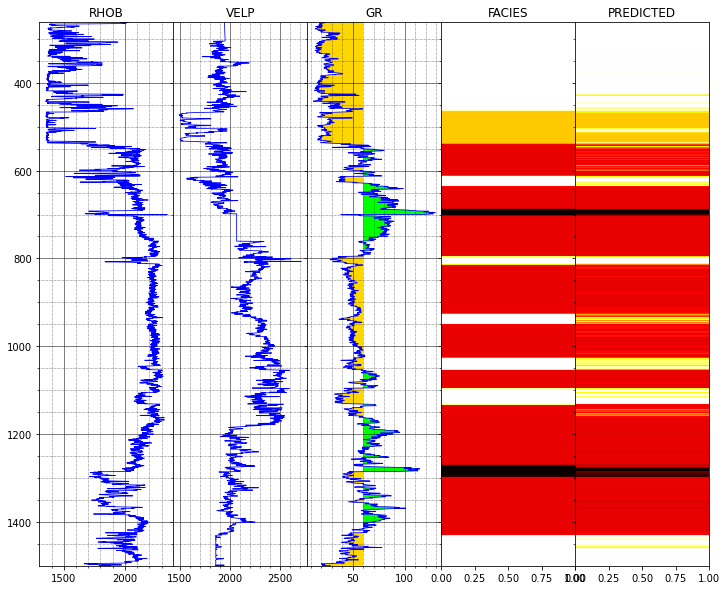

In [ ]:
########################
y_pred = model.predict(X_train)
mnemonics = list(data.columns)
data = data.values
rows, cols = 1, 5
fig,ax = plt.subplots(nrows = rows, ncols=cols, figsize=(12,10), sharey=True)
for i in range(cols):
    if i < cols-2:
        ax[i].plot(data[:,i+1],data[:,0],'b', linewidth=0.8)
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='black')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        ax[i].set_ylim(max(data[:, 0]), min(data[:, 0]), 0)
        ax[i].set_title('%s' %mnemonics[i+1])
    elif i==cols-2:
        F = np.vstack((data[:,-1],data[:,-1])).T
        m = ax[i].imshow(F, aspect='auto',cmap='hot_r', extent=[0,1,max(data[:,0]), min(data[:,0])])
        ax[i].set_title('%s' % mnemonics[i + 1])
    elif i==cols-1:
        F = np.vstack((y_pred,y_pred)).T
        m = ax[i].imshow(F, aspect='auto',cmap='hot_r', extent=[0,1,max(data[:,0]), min(data[:,0])])
        ax[i].set_title('PREDICTED')
cl = 60
y2 = data[:,3]
y1 = y2*0+cl
ax[2].fill_betweenx(data[:, 0], y1, y2, where=(y1 >= y2), color='gold', linewidth=0)
ax[2].fill_betweenx(data[:, 0], y1, y2, where=(y1 < y2), color='lime', linewidth=0)
plt.subplots_adjust(wspace=0)
plt.show()